## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests

In [2]:
# setting the option to allow for full viewing of columns in DFs
pd.set_option("max_columns", None)

In [3]:
df = pd.read_csv("data/airline_sample_150k.csv")

In [4]:
df.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-01-01,AA,AA_CODESHARE,AA,5241,OH,N703PS,5241,11057,CLT,"Charlotte, NC",12448,JAN,"Jackson/Vicksburg, MS",2054,2119.0,25.0,22.0,2141.0,2213.0,5.0,2149,2218.0,29.0,0,NaN,0,N,115,119.0,92.0,1,562,25.0,0.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2019-01-01,NK,NK,NK,115,NK,N525NK,115,10821,BWI,"Baltimore, MD",11292,DEN,"Denver, CO",1955,1953.0,-2.0,16.0,2009.0,2204.0,8.0,2157,2212.0,15.0,0,NaN,0,N,242,259.0,235.0,1,1491,0.0,0.0,15.0,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
# checking for null values
df.isnull().values.any()

True

In [6]:
df.isnull().sum()

fl_date                     0
mkt_unique_carrier          0
branded_code_share          0
mkt_carrier                 0
mkt_carrier_fl_num          0
op_unique_carrier           0
tail_num                  481
op_carrier_fl_num           0
origin_airport_id           0
origin                      0
origin_city_name            0
dest_airport_id             0
dest                        0
dest_city_name              0
crs_dep_time                0
dep_time                 2534
dep_delay                2578
taxi_out                 2670
wheels_off               2670
wheels_on                2763
taxi_in                  2763
crs_arr_time                0
arr_time                 2703
arr_delay                3064
cancelled                   0
cancellation_code      156192
diverted                    0
dup                         0
crs_elapsed_time            0
actual_elapsed_time      3030
air_time                 3089
flights                     0
distance                    0
carrier_de

In [7]:
# dropping all cancelled flights since they will skew the model
df = df[df['cancelled'] != 1]

# same reasoning for dropping diverted flights
df = df[df['diverted'] != 1]

In [8]:
# dropping the no_name column comprised of commas since this is a csv
df = df.drop('no_name', axis = 1)

In [9]:
# getting rid of unimportant columns

df = df.drop(axis = 1, labels = ['branded_code_share', 'mkt_carrier_fl_num', 'tail_num', 'op_carrier_fl_num', 'cancelled', 'cancellation_code', 'diverted', 'flights', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime'])

In [10]:
df.head(2)

,fl_date,mkt_unique_carrier,mkt_carrier,op_unique_carrier,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,dup,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019-01-01,AA,AA,OH,11057,CLT,"Charlotte, NC",12448,JAN,"Jackson/Vicksburg, MS",2054,2119.0,25.0,22.0,2141.0,2213.0,5.0,2149,2218.0,29.0,N,115,119.0,92.0,562,25.0,0.0,4.0,0.0,0.0
1,2019-01-01,NK,NK,NK,10821,BWI,"Baltimore, MD",11292,DEN,"Denver, CO",1955,1953.0,-2.0,16.0,2009.0,2204.0,8.0,2157,2212.0,15.0,N,242,259.0,235.0,1491,0.0,0.0,15.0,0.0,0.0


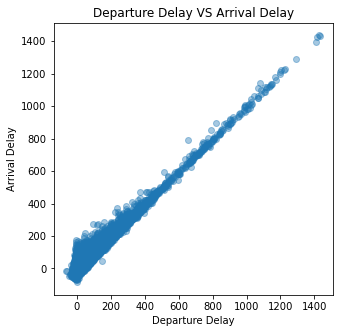

In [11]:
plt.figure(figsize=(5,5))
plt.scatter(df['dep_delay'], df['arr_delay'], alpha = 0.4)
plt.title('Departure Delay VS Arrival Delay')
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')

plt.show()
# this shows a strong correlation between dep_delay and arr_delay as expected

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [12]:
# checking for and dropping null values in arr_delay
df["arr_delay"].isnull().sum()
df.dropna(subset = ["arr_delay"], inplace = True)

In [13]:
# getting the absolute values of the z-scores to drop outliers
arr_delay_zs = np.abs(stats.zscore(df["arr_delay"], nan_policy = 'omit'))
# this returns booleans with False classified for values greater than 3 std's from the mean
arr_delay_zs3 = arr_delay_zs <= 3

# masking the values to return 
df['arr_delay_zs'] = df["arr_delay"][arr_delay_zs3]

In [14]:
df['arr_delay_zs'].dropna(inplace = True)

In [15]:
#df['arr_delay_zs'].fillna(0, inplace = True)
df["arr_delay_zs"].isnull().sum()

0

In [16]:
df["arr_delay_zs"].describe()

count    153302.000000
mean          1.079073
std          28.511491
min         -86.000000
25%         -15.000000
50%          -6.000000
75%           7.000000
max         157.000000
Name: arr_delay_zs, dtype: float64

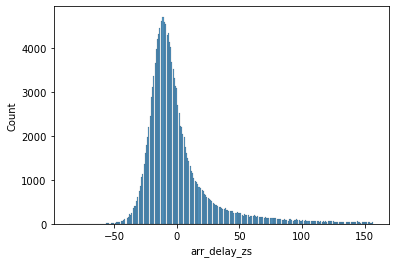

In [17]:
histplot = sns.histplot(data = df["arr_delay_zs"])

In [18]:
delay_arr = df['arr_delay_zs'].to_numpy()
delay_arr

array([ 29.,  15.,  94., ...,  27., -21.,  -6.])

In [19]:
import random
# passing into a list to use in random.sample
delay_arr = list(delay_arr)
randsamp_delarr = random.sample(delay_arr, 1000)

In [20]:
# using the shapiro test to check for normal distribution
shapiro_test = stats.shapiro(randsamp_delarr)
shapiro_test

ShapiroResult(statistic=0.772479772567749, pvalue=4.6061826493030474e-35)

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [21]:
# splitting the date on the hyphen to easily access the month
spl_date = [date.split('-')[1] for date in df['fl_date']]

In [22]:
df['months'] = spl_date
df.head(2)

,fl_date,mkt_unique_carrier,mkt_carrier,op_unique_carrier,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,dup,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay_zs,months
0,2019-01-01,AA,AA,OH,11057,CLT,"Charlotte, NC",12448,JAN,"Jackson/Vicksburg, MS",2054,2119.0,25.0,22.0,2141.0,2213.0,5.0,2149,2218.0,29.0,N,115,119.0,92.0,562,25.0,0.0,4.0,0.0,0.0,29.0,01
1,2019-01-01,NK,NK,NK,10821,BWI,"Baltimore, MD",11292,DEN,"Denver, CO",1955,1953.0,-2.0,16.0,2009.0,2204.0,8.0,2157,2212.0,15.0,N,242,259.0,235.0,1491,0.0,0.0,15.0,0.0,0.0,15.0,01


In [23]:
# Reordering the DF by saving the columns and then adding them after the months column

cols = list(df.columns)
cols.pop(cols.index('fl_date'))
cols.pop(cols.index('months'))
df = df[['fl_date','months'] + cols]
df.head(2)

,fl_date,months,mkt_unique_carrier,mkt_carrier,op_unique_carrier,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,dup,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay_zs
0,2019-01-01,01,AA,AA,OH,11057,CLT,"Charlotte, NC",12448,JAN,"Jackson/Vicksburg, MS",2054,2119.0,25.0,22.0,2141.0,2213.0,5.0,2149,2218.0,29.0,N,115,119.0,92.0,562,25.0,0.0,4.0,0.0,0.0,29.0
1,2019-01-01,01,NK,NK,NK,10821,BWI,"Baltimore, MD",11292,DEN,"Denver, CO",1955,1953.0,-2.0,16.0,2009.0,2204.0,8.0,2157,2212.0,15.0,N,242,259.0,235.0,1491,0.0,0.0,15.0,0.0,0.0,15.0


In [24]:
# Changing months dtype to int so that we can perform numerical operations on the values
df['months'] = df['months'].astype(int)

In [25]:
df['arr_delay_zs'].isnull().sum()
#df['arr_delay_zs']

2455

In [26]:
df.groupby(by = 'months').mean()[['arr_delay_zs']]

,arr_delay_zs
months,
1,-0.707178
2,1.514435
3,-0.528589
4,0.300962
5,1.977329
6,4.929423
7,3.300468
8,3.487018
9,-1.608566


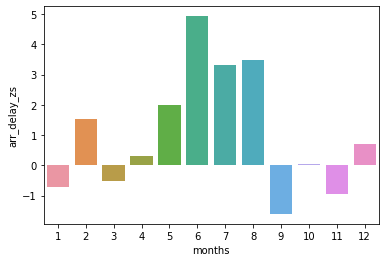

In [27]:
month_vs_delay = sns.barplot(x = df['months'], y = df['arr_delay_zs'], ci = None)

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [28]:
# checking for any nulls in the column
df['dep_time'].isnull().any()

False

In [29]:
# scanning through the DF, we can see different lengths of military time for the dep_time
# We add a leading 0 to standardize the layout and make it easier to work with

# This lambda function fills 0's ahead of the provided numbers up until there are 4 numbers in total
# eg. 536 becomes 0536, 26 becomes 0026, 1234 remains unchanged as 1234
df['dep_time_0s'] = df['dep_time'].apply(lambda x: '%04.0f' %x)

In [30]:
df['dep_time_0s'].isnull().sum()

0

In [31]:
# Now we need to extract the hour from dep_time_0s
# The hour is just the 1st 2 numbers in each record object
# The int is passed here to convert the output from object to int64
hours = [int(time[:2]) for time in df['dep_time_0s']]
df['hours'] = hours

In [32]:
df['hours'].head()

0    21
1    19
2    16
3     5
4     9
Name: hours, dtype: int64

In [33]:
df_hours_taxi = df[['hours','taxi_out']]

In [34]:
# Now we groupby using the time of day and compare the average taxi_out
df_hours_taxi.groupby(['hours']).mean().sort_values(by = 'taxi_out', ascending = False)

,taxi_out
hours,
8,19.371571
9,18.443868
18,18.365078
20,18.202119
10,17.926219
17,17.794703
7,17.727529
19,17.529242
15,17.486080


#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [35]:
# assuming that the question here is asking for proportion of delays caused by depratrue delays

df.head()
# we want to see proportion of dep_delay > 0 resulting in arr_delay > 0
df_del_arr = df.loc[(df['dep_delay'] > 0) & (df['arr_delay'] > 0)]
df_del_arr = df_del_arr[['dep_delay', 'arr_delay']]
len(df_del_arr),len(df.loc[df['arr_delay'] > 0])

(38923, 54544)

In [36]:
# Avg percentage of delays created before departure
delays_before_dep = (len(df_del_arr)) / ((len(df.loc[df['arr_delay'] > 0])))
delays_before_dep

0.7136073628630096

In [37]:
# Difference between arr_delay and dep_delay
df['time_diff'] = df['arr_delay'] - df['dep_delay']
# Returns the trips where time was saved
time_saved = df.loc[(df['time_diff'] < 0) & (df['dep_delay'] > 0)]
# Returns the trips where more time was lost
further_delay = df.loc[df['time_diff'] > 0]

In [38]:
print('Number of flights that delayed further: ', len(further_delay))
print('Number of flights that saved time: ', len(time_saved))
print('Percentage of flights that saved time after a delay: ', ((len(time_saved)) / (len(df.loc[df['dep_delay'] > 0])))*100)

Number of flights that delayed further:  40455
Number of flights that saved time:  37411
Percentage of flights that saved time after a delay:  70.37301781381088


#### **Task 6**: How many states cover 50% of US air traffic? 

In [39]:
# We can get state names from the origin_city_name column
df_states = df['origin_city_name'].reset_index()
# The state name is the last two indices of the string in the origin_city_name column
# We can retrieve that by simple slicing
df_states['state'] = df_states['origin_city_name'].str[-2:]

In [40]:
# This finds the number of flight records corresponding to each state
# Normalizing it allows us to create percentages to use for cumsum
state_counts = df_states['state'].value_counts(normalize = True)
# Resetting the index here to get the columns back in order
state_counts = state_counts.reset_index()
state_counts['cumsum'] = state_counts['state'].cumsum()
state_counts.head(10)

# We can see here that the top 8 states make up 50% of the US air traffic

,index,state,cumsum
0,CA,0.109504,0.109504
1,TX,0.098634,0.208138
2,FL,0.072883,0.281021
3,IL,0.061904,0.342925
4,GA,0.052781,0.395706
5,NY,0.050566,0.446272
6,NC,0.045860,0.492132
7,CO,0.040531,0.532663
8,PA,0.030008,0.562671
9,DC,0.029841,0.592513


#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [41]:
#df["dep_delay"] = df["dep_delay"][(np.abs(stats.zscore(df["dep_delay"])) < 3)]

df['speed'] = df['distance'] / df['air_time']

#ztest ,pval = stests.ztest(df['bp_before'], x2=None, value=156)
#print(float(pval))
#if pval<0.05:
#    print("reject null hypothesis")
#else:
#    print("accept null hypothesis")

In [42]:
#df_w_delay = df.loc[(df['dep_delay'] > 0)]
#df_w_delay = df_w_delay[['dep_delay', 'speed']]

#df_no_delay = df.loc[(df['dep_delay'] <= 0)]
#df_no_delay = df_no_delay[['dep_delay', 'speed']]

In [43]:
#fig, ax = plt.subplots(figsize=(8, 8))

# add the plots for each dataframe
#sns.regplot(y='dep_delay', x='speed', data=df_w_delay, fit_reg=True, ci=None, ax=ax, label='Speed with delay')
#sns.regplot(y='dep_delay', x='speed', data=df_no_delay, fit_reg=True, ci=None, ax=ax, label='Speed without delay')
#ax.set(xlabel='Speed', ylabel='Departure Delay')
#ax.legend()
#plt.show()

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

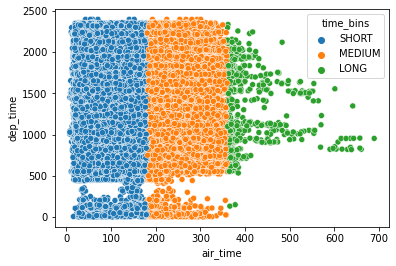

In [44]:
# we want to bin the data based on air_time feature
# i will take 0-3 hours to be SHORT, 3-6 hours to be MEDIUM and 6+ hours to be long

bins = [0, 180, 360, np.inf]
labels = ['SHORT', 'MEDIUM', 'LONG']
df['time_bins'] = pd.cut(df['air_time'], bins=bins, labels=labels)
#df.head()
#df['time_bins']
plot = sns.scatterplot(data = df, x = 'air_time', y = 'dep_time', hue = df['time_bins'], ci = None)

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [68]:
df_flights = df[['origin', 'dest']]

In [69]:
# Grouping the number of flights by airport
# The column labels are "swapped" because grouping by one gives the count of the other
origin_flight_counts = df_flights.groupby('dest').count().reset_index()
dest_flight_counts = df_flights.groupby('origin').count().reset_index()

In [70]:
# Renaming the origin and dest columns to airport so that we can merge on the column
origin_flight_counts = origin_flight_counts.rename(columns = {'dest': 'airport', 'origin': 'origin_flight_counts'})
dest_flight_counts = dest_flight_counts.rename(columns = {'origin': 'airport', 'dest': 'dest_flight_counts'})

In [71]:
df_total_flights = pd.merge(origin_flight_counts, dest_flight_counts, on = 'airport', how = 'left')
df_total_flights.head()

,airport,origin_flight_counts,dest_flight_counts
0,ABE,117,111.0
1,ABI,31,38.0
2,ABQ,509,554.0
3,ABR,13,14.0
4,ABY,19,33.0


In [72]:
# Getting the sum of all inbound and outbound flights from each airport
df_total_flights['total_airport_flights'] = df_total_flights['origin_flight_counts'] + df_total_flights['dest_flight_counts']
top_10_busiest = df_total_flights[['airport', 'total_airport_flights']].sort_values(by = 'total_airport_flights', ascending = False)[:10]

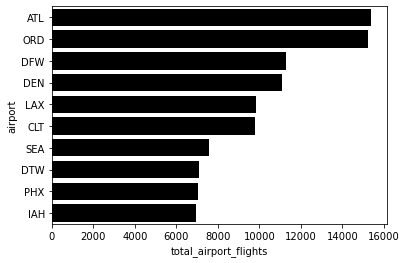

In [87]:
sns.barplot(x = 'total_airport_flights', y = 'airport', data = top_10_busiest, color = 'black')
plt.show()

In [ ]:
# To figure out how much these airports cover, we should use cumsum


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

## Some extra exploration
___

In [ ]:
# Getting the total departure delay caused by all factors
df['total_delay'] = (df['carrier_delay'] + df['weather_delay']
             + df['nas_delay'] + df['security_delay'] + df['late_aircraft_delay'])

df_delays = df.loc[(df['total_delay'] != np.NaN)]
df['total_delay'].fillna(0, inplace=True)
df['total_delay'].head()

In [ ]:
# Setting the groups that will be used ni the stacked barchart
carrier_group = df_delays['carrier_delay'].groupby(df_delays['mkt_unique_carrier']).mean()
weather_group = df_delays['weather_delay'].groupby(df_delays['mkt_unique_carrier']).mean()
nas_group = df_delays['nas_delay'].groupby(df_delays['mkt_unique_carrier']).mean()
security_group = df_delays['security_delay'].groupby(df_delays['mkt_unique_carrier']).mean()
late_group = df_delays['late_aircraft_delay'].groupby(df_delays['mkt_unique_carrier']).mean()

w_bottom = carrier_group.values
n_bottom = w_bottom + weather_group.values
s_bottom = n_bottom + nas_group.values
l_bottom = s_bottom + security_group.values

x = carrier_group.index.values

fig, ax = plt.subplots(figsize = (12,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),carrier_group.values, align='center', label='Carrier Delay')
ax.bar(np.arange(len(x)),weather_group.values, align='center', bottom=w_bottom, label='Weather Delay')
ax.bar(np.arange(len(x)),nas_group.values, align='center', bottom=n_bottom, label='NAS Delay')
ax.bar(np.arange(len(x)),security_group.values, align='center', bottom=s_bottom, label='Security Delay')
ax.bar(np.arange(len(x)),late_group.values, align='center', bottom=l_bottom, label='Late Aircraft Delay')

ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Departure Delay in minutes')

plt.legend()
plt.show()

In [ ]:
# This sets only flights that have a delay
df_delays = df_delays[df_delays['total_delay'] > 0]

In [ ]:
# Making the columns by passing them into separate DFs to make groupby easier to carry out
carrier_flights = df['mkt_unique_carrier'].groupby(df['mkt_unique_carrier']).count()
carrier_delays = df_delays['total_delay'].groupby(df_delays['mkt_unique_carrier']).count()
carrier_avg_time = df['air_time'].groupby(df['mkt_unique_carrier']).mean()
carrier_avg_dist = df['distance'].groupby(df['mkt_unique_carrier']).mean()
carrier_avg_delay = df['total_delay'].groupby(df['mkt_unique_carrier']).mean()
carrier_avg_taxiIn = df['taxi_in'].groupby(df['mkt_unique_carrier']).mean()
carrier_avg_taxiOut = df['taxi_out'].groupby(df['mkt_unique_carrier']).mean()

In [ ]:
# Concatenating the DFs to form one table
summary_table_carrier = pd.concat([carrier_flights, carrier_delays, carrier_avg_time, carrier_avg_dist,
                                   carrier_avg_delay, carrier_avg_taxiIn, carrier_avg_taxiOut], axis=1)

summary_table_carrier.columns = ['Total Flights', 'Total Delays', 'Avg Flight Time (mins)',
                         'Avg Flight Distance', 'Avg Flight Delay (mins)', 
                         'Avg Taxi-In (mins)', 'Avg Taxi-Out (mins)']

summary_table_carrier